In [62]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

import numpy as np

original = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Original.jpg")
colored = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Original.jpg")
duplicate = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Original.jpg")
croped = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Croped.jpg")
recolored = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Recolored.jpg")
recolored2 = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Recolored2.jpg")
rotated = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Rotated.jpg")
rotatedColored = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Rotated.jpg")
popart = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/PopArt.jpg")
resized = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Resized.jpg")
sharpened = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Sharpened.jpg")
sunburst = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Filtered Image/Sunburst.jpg")


_360pan = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Cutted Images/3d.jpg")
part1 = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Cutted Images/3d_res.jpg")
part2 = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Cutted Images/_80_340.jpg")
cubemap = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Cutted Images/cubemap.jpg")

moscowCubemap = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Moscow4k/cubemap.jpg")
moscowPart1 = cv2.imread("/Users/amir/Desktop/ImageRecognition/Images/Moscow4k/Pieces/_60_320.jpg")

img1 = moscowCubemap
img2 = moscowPart1


# 

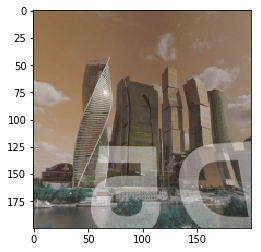

In [57]:
plt.imshow(moscowPart1)

In [63]:
img2 = cv2.flip(moscowPart1, 1)

In [64]:
MIN_MATCH_COUNT = 10

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append(m)

In [65]:
#good = good[::10]
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w,c = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    print('success')
else:
    print('FAIL')
    matchesMask = None 

success


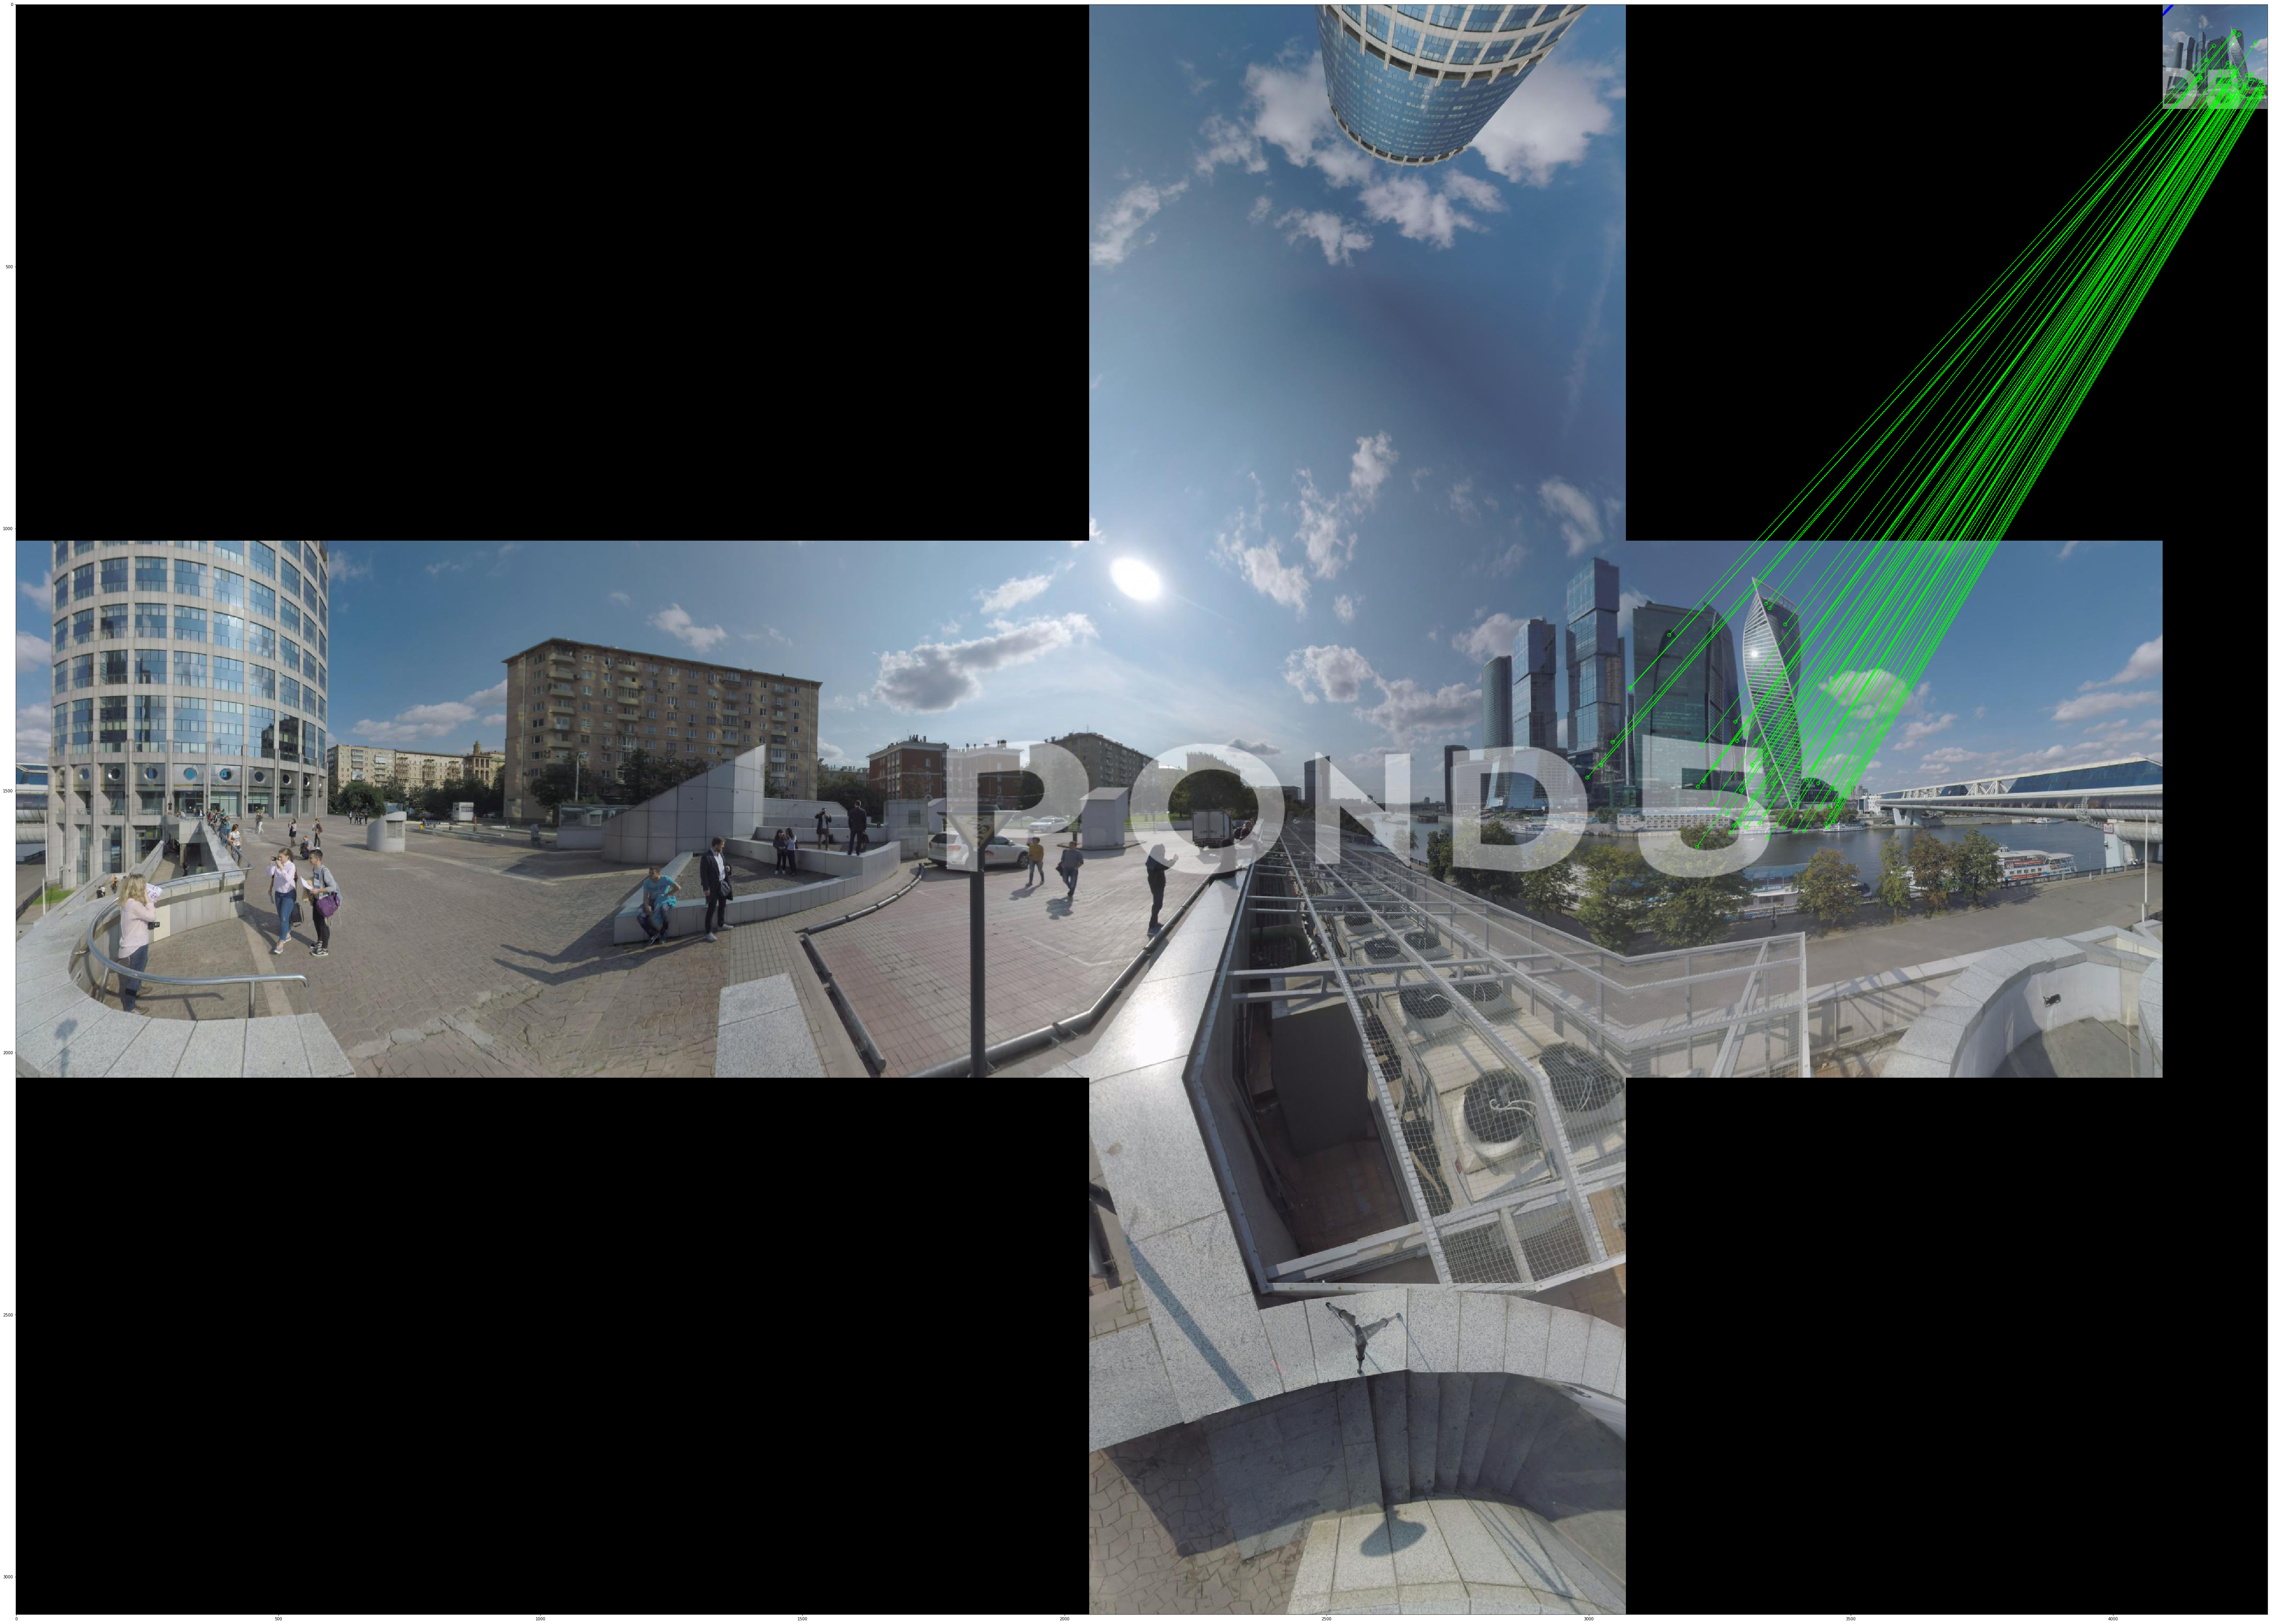

(<matplotlib.image.AxesImage at 0x1275f4cc0>, None)

In [66]:

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None, **draw_params)

plt.figure(figsize=(100, 100))
plt.imshow(img3[:, :, ::-1], 'gray'),plt.show()

In [ ]:
plt.